In [16]:
# Data Diri
# Name : Uun Khotimah
# Email : uunkhotimah7@gmail.com
# Domisili : Yogyakarta

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
# Download and extract the dataset
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [3]:
# Create ImageDataGenerator object for image augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

In [4]:
# Training set and validation set
train_generator = datagen.flow_from_directory(
    'rockpaperscissors/rps-cv-images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
validation_generator = datagen.flow_from_directory(
    'rockpaperscissors/rps-cv-images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [5]:
# Sequential model with modifications
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])


In [6]:
# Compile the model with a smaller learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train the model for more epochs
start_time = datetime.datetime.now()

model.fit(train_generator, epochs=10, validation_data=validation_generator)

end_time = datetime.datetime.now()
elapsed_time = end_time - start_time
print(f'Training completed in {elapsed_time}')

Epoch 1/10
42/42 [==============================] - 21s 504ms/step - loss: 0.6365 - accuracy: 0.7496 - val_loss: 0.6240 - val_accuracy: 0.7288
Epoch 2/10
42/42 [==============================] - 16s 379ms/step - loss: 0.5868 - accuracy: 0.7664 - val_loss: 0.5242 - val_accuracy: 0.7952
Epoch 3/10
42/42 [==============================] - 17s 403ms/step - loss: 0.5120 - accuracy: 0.7976 - val_loss: 0.4686 - val_accuracy: 0.8249
Epoch 4/10
42/42 [==============================] - 16s 382ms/step - loss: 0.4842 - accuracy: 0.8082 - val_loss: 0.4461 - val_accuracy: 0.8284
Epoch 5/10
42/42 [==============================] - 21s 496ms/step - loss: 0.4492 - accuracy: 0.8257 - val_loss: 0.4221 - val_accuracy: 0.8444
Epoch 6/10
42/42 [==============================] - 16s 382ms/step - loss: 0.3953 - accuracy: 0.8524 - val_loss: 0.3620 - val_accuracy: 0.8810
Epoch 7/10
42/42 [==============================] - 21s 513ms/step - loss: 0.3387 - accuracy: 0.8760 - val_loss: 0.3169 - val_accuracy: 0.8822

In [11]:
# Evaluate the model
accuracy = model.evaluate(validation_generator)[1]
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

28/28 [==============================] - 7s 238ms/step - loss: 0.2329 - accuracy: 0.9153
Accuracy of the model: 91.53%


In [12]:
# Save the model
timestamp = datetime.datetime.now().strftime("%Y%m%d%H%M%S")
model.save(f'rock_paper_scissors_model_{timestamp}.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Saving 8pxbBnbfqzX3ijVM.png to 8pxbBnbfqzX3ijVM.png


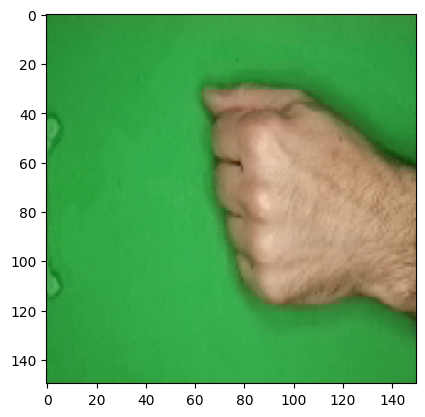

1/1 [==============================] - 0s 348ms/step
Prediction: Rock


In [13]:
# Upload an image
uploaded = files.upload()

# Load the trained model
model = tf.keras.models.load_model(f'rock_paper_scissors_model_{timestamp}.h5')

class_labels = {0: 'Paper', 1: 'Rock', 2: 'Scissors'}

for fn in uploaded.keys():
    # Predict the image
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize pixel values
    images = np.vstack([x])

    # Use the model to predict class probabilities
    predicted_probabilities = model.predict(images)

    # Get the predicted class
    predicted_class = np.argmax(predicted_probabilities)

    predicted_label = class_labels[predicted_class]
    print(f'Prediction: {predicted_label}')

Saving 0RA9rcrv8iVvuDDU.png to 0RA9rcrv8iVvuDDU.png


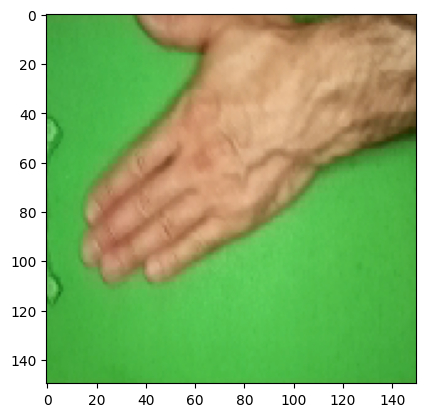

1/1 [==============================] - 0s 85ms/step
Prediction: Paper


In [14]:
# Upload an image
uploaded = files.upload()

# Load the trained model
model = tf.keras.models.load_model(f'rock_paper_scissors_model_{timestamp}.h5')

class_labels = {0: 'Paper', 1: 'Rock', 2: 'Scissors'}

for fn in uploaded.keys():
    # Predict the image
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize pixel values
    images = np.vstack([x])

    # Use the model to predict class probabilities
    predicted_probabilities = model.predict(images)

    # Get the predicted class
    predicted_class = np.argmax(predicted_probabilities)

    predicted_label = class_labels[predicted_class]
    print(f'Prediction: {predicted_label}')

Saving Z3isJg9IBOn3ZHFZ.png to Z3isJg9IBOn3ZHFZ.png


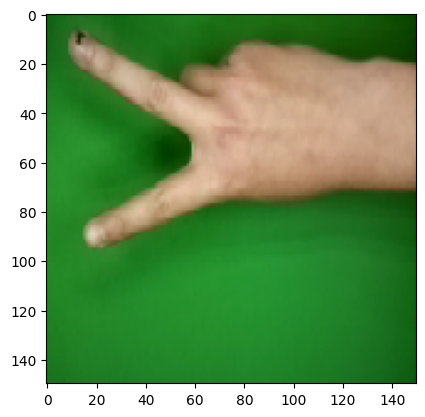

1/1 [==============================] - 0s 85ms/step
Prediction: Scissors


In [15]:
# Upload an image
uploaded = files.upload()

# Load the trained model
model = tf.keras.models.load_model(f'rock_paper_scissors_model_{timestamp}.h5')

class_labels = {0: 'Paper', 1: 'Rock', 2: 'Scissors'}

for fn in uploaded.keys():
    # Predict the image
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalize pixel values
    images = np.vstack([x])

    # Use the model to predict class probabilities
    predicted_probabilities = model.predict(images)

    # Get the predicted class
    predicted_class = np.argmax(predicted_probabilities)

    predicted_label = class_labels[predicted_class]
    print(f'Prediction: {predicted_label}')